In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F
import time

In [3]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1, 0.1, 0.1), (0.3, 0.3, 0.3))
])

train_set = datasets.CIFAR10('Data_CIFAR10/', download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.CIFAR10('DATA_CIFAR10/', download=True, train=False, transform=transform)
testLoader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

cuda
Files already downloaded and verified
Files already downloaded and verified


<class 'torch.Tensor'>
torch.Size([64, 3, 32, 32])
torch.Size([64])


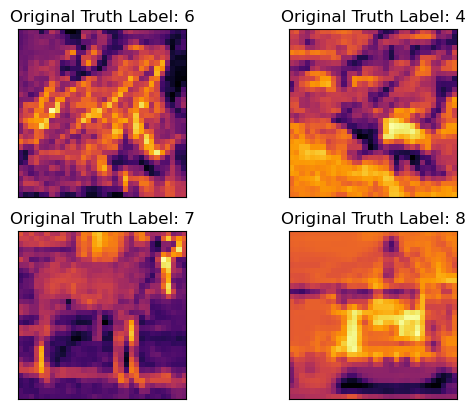

In [3]:
training_data = enumerate(trainLoader)
batch_idx, (images, labels) = next(training_data)
print(type(images))
print(images.shape)
print(labels.shape)

fig = plt.figure()
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i][0], cmap='inferno')
    plt.title("Original Truth Label: {}".format(labels[i]))
    plt.yticks([])
    plt.xticks([])
plt.show()

# Tranfer Learning

In [6]:
import torch
import torchvision.models as models
import torch.nn as nn

# Load a pre-trained model (e.g., ResNet50)
pretrained_model = models.resnet50(pretrained=True)

# Modify the model (replace classifier, freeze layers, etc.)
# For simplicity, let's replace the classifier with a new fully connected layer
num_ftrs = pretrained_model.fc.in_features
pretrained_model.fc = nn.Linear(num_ftrs, 10)  # Assuming 10 classes for classification

# Freeze layers if needed
for param in pretrained_model.parameters():
    param.requires_grad = False  # Freeze all layers

# Replace with your own model architecture if needed

# Transfer the model to the appropriate device
pretrained_model = pretrained_model.to(device)

# Define optimizer, loss function, etc.

# Train the model
for epoch in range(num_epochs):
    # Training loop
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = pretrained_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Generate images from sampled latent vectors
with torch.no_grad():
    generated_images = pretrained_model(latent_samples.view(-1, chanels, hight, wight))  

# Visualize generated images
plt.figure(figsize=(10, 4))
print('Generated images')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_images[i].numpy().squeeze(), cmap='gray_r')
    plt.axis('off')
plt.show()




In [7]:
# Initialize the model
model = Autoencoder().to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_losses = []
# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for data in trainLoader:
        images, _ = data
        images = images.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(trainLoader)
    train_losses.append(epoch_loss)
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainLoader)}")

print('Finished Training')


/home/daniel/anaconda3/envs/deep/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [1/10], Loss: 0.6589647618782185
Epoch [2/10], Loss: 0.6031855454530253
Epoch [3/10], Loss: 0.5994592077286957
Epoch [4/10], Loss: 0.597697310969043
Epoch [5/10], Loss: 0.5957735157607461
Epoch [6/10], Loss: 0.5935347529933276
Epoch [7/10], Loss: 0.591191000074072
Epoch [8/10], Loss: 0.5903972077857503
Epoch [9/10], Loss: 0.5898720854917145
Epoch [10/10], Loss: 0.5895960259315608
Finished Training


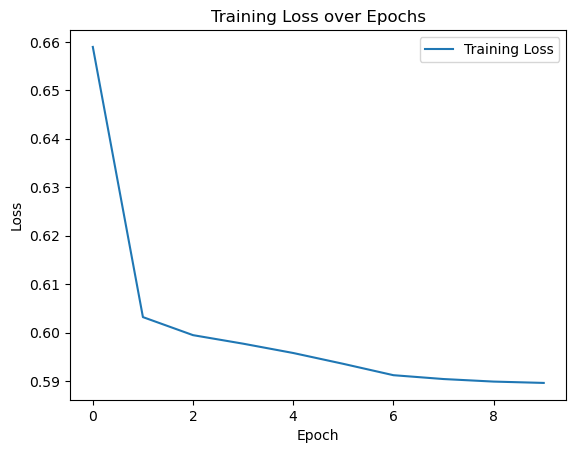

In [8]:
# Plot the training loss over epochs
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Original images


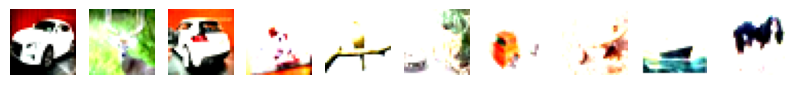

Reconstructed images


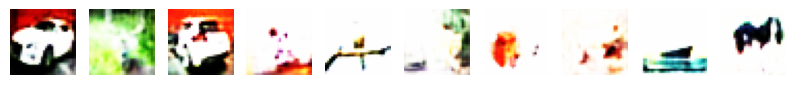

In [12]:
# Get a batch of test images
dataiter = iter(testLoader)
images, labels = next(dataiter)

# Show original images
plt.figure(figsize=(10, 4))
print('Original images')
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
    plt.axis('off')
plt.show()

# Show reconstructed images
with torch.no_grad():
    images = images.to(device)
    outputs = model(images)
    outputs = outputs.cpu()
    plt.figure(figsize=(10, 4))
    print('Reconstructed images')
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(np.transpose(outputs[i].numpy(), (1, 2, 0)))
        plt.axis('off')
    plt.show()



In [ ]:
from sklearn.mixture import GaussianMixture

# Get latent space representations for training data
latent_vectors = []
with torch.no_grad():
    for data in trainLoader:
        images, _ = data
        images = images.to(device)
        latent_vector = model.encoder(images).view(images.size(0), -1).cpu().numpy()
        latent_vectors.append(latent_vector)
latent_vectors = np.concatenate(latent_vectors)

# Fit a Gaussian Mixture Model
n_components = 18  # Adjust the number of components as needed
gmm = GaussianMixture(n_components=n_components, covariance_type='full')
gmm.fit(latent_vectors)


/home/daniel/anaconda3/envs/deep/lib/python3.9/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/daniel/anaconda3/envs/deep/lib/python3.9/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


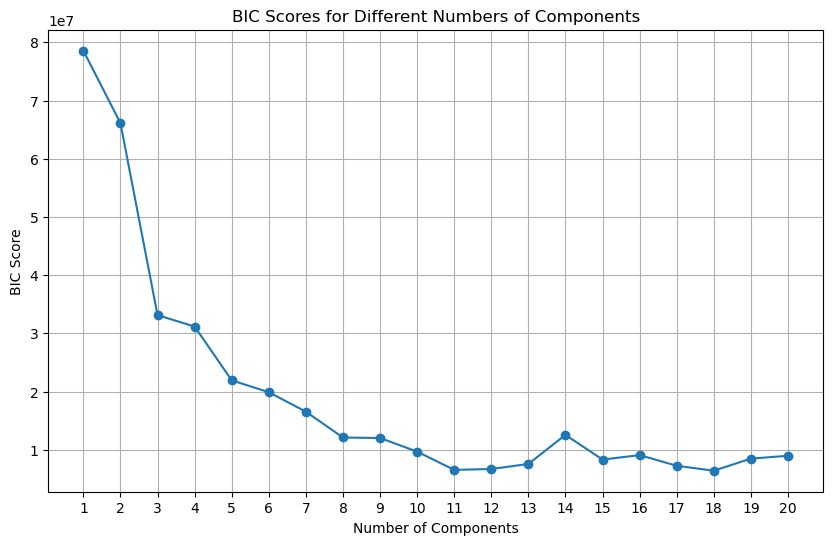

Optimal number of components: 18


In [56]:
# Initialize list to store BIC scores
bic_scores = []
num_components_range = range(2, 21)
# Try different numbers of components
for n_components in num_components_range:  # Adjust the range as needed
    # Fit GMM with current number of components
    gmm = GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(latent_vectors)  # Assuming latent_vectors is already computed
    
    # Calculate BIC score
    bic = gmm.bic(latent_vectors)
    bic_scores.append(bic)

# Plot BIC scores
plt.figure(figsize=(10, 6))
plt.plot(num_components_range, bic_scores, marker='o', linestyle='-')
plt.title('BIC Scores for Different Numbers of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.xticks(num_components_range)
plt.grid(True)
plt.show()

# Find the optimal number of components with minimum BIC score
optimal_components = np.argmin(bic_scores) + 1  # +1 to account for 0-based indexing
print("Optimal number of components:", optimal_components)


In [ ]:
# Get a sample input image
sample_input, _ = next(iter(trainLoader))
sample_input = sample_input.to(device)

# Pass the sample input through the encoder
with torch.no_grad():
    encoder_output = model.encoder(sample_input)

# Print the shape of the encoder output
print("Encoder output shape:", encoder_output.shape)
chanels = encoder_output.shape[1]
hight, wight = encoder_output.shape[2],encoder_output.shape[3]
hight

In [ ]:
# Sample from the GMM
latent_samples = gmm.sample(10)  # Generate 10 samples
latent_samples = latent_samples[0]  # Extract samples

# Convert samples to torch tensor
latent_samples = torch.from_numpy(latent_samples).float().to(device)

# Generate images from sampled latent vectors
with torch.no_grad():
    generated_images = model.decoder(latent_samples.view(-1, chanels, hight, wight))  
    generated_images = generated_images.cpu()


# Visualize generated images
plt.figure(figsize=(10, 4))
print('Generated images')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.transpose(generated_images[i].numpy(), (1, 2, 0)))
    plt.axis('off')
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms, models
from torch import nn
from sklearn.mixture import GaussianMixture

# Set device
device = ("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load CIFAR10 dataset
train_set = datasets.CIFAR10('Data_CIFAR10/', download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.CIFAR10('DATA_CIFAR10/', download=True, train=False, transform=transform)
testLoader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

# Load pre-trained ResNet50 model
encoder = models.resnet50(pretrained=True)
encoder = nn.Sequential(*list(encoder.children())[:-1])  # Remove the final fully connected layer

# Freeze the parameters
for param in encoder.parameters():
    param.requires_grad = False

# Modify decoder
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.conv1 = nn.ConvTranspose2d(2048, 1024, kernel_size=3, stride=2, padding=1, output_padding=1)  # Adjusted stride and padding
        self.conv2 = nn.ConvTranspose2d(1024, 512, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv3 = nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv4 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv5 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1)  # Adjusted stride and padding
        self.conv6 = nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1)   # Adjusted stride and padding

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU(inplace=True)(x)
        x = self.conv2(x)
        x = nn.ReLU(inplace=True)(x)
        x = self.conv3(x)
        x = nn.ReLU(inplace=True)(x)
        x = self.conv4(x)
        x = nn.ReLU(inplace=True)(x)
        x = self.conv5(x)
        x = nn.ReLU(inplace=True)(x)
        x = self.conv6(x)
        x = nn.Sigmoid()(x)
        return x

# Define the autoencoder
class Autoencoder(nn.Module):
    def __init__(self, encoder, decoder):
        super(Autoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the decoder
decoder = Decoder()

# Initialize the autoencoder
model = Autoencoder(encoder, decoder).to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_losses = []

# Training loop
epochs = 40
for epoch in range(epochs):
    running_loss = 0.0
    for data in trainLoader:
        images, _ = data
        images = images.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        # Resize images to match output size for the loss calculation
        resized_images = nn.functional.interpolate(images, size=(224, 224))
        loss = criterion(outputs, resized_images)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(trainLoader)
    train_losses.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainLoader)}")

print('Finished Training')

# Get latent space representations for training data
latent_vectors = []
with torch.no_grad():
    for data in trainLoader:
        images, _ = data
        images = images.to(device)
        latent_vector = model.encoder(images).view(images.size(0), -1).cpu().numpy()
        latent_vectors.append(latent_vector)
latent_vectors = np.concatenate(latent_vectors)

# Fit a Gaussian Mixture Model
n_components = 18  # Adjust the number of components as needed
gmm = GaussianMixture(n_components=n_components, covariance_type='full')
gmm.fit(latent_vectors)

# Get a sample input image
sample_input, _ = next(iter(trainLoader))
sample_input = sample_input.to(device)

# Pass the sample input through the encoder
with torch.no_grad():
    encoder_output = model.encoder(sample_input)

# Print the shape of the encoder output
print("Encoder output shape:", encoder_output.shape)
channels = encoder_output.shape[1]
height, width = encoder_output.shape[2], encoder_output.shape[3]

# Sample from the GMM
latent_samples = gmm.sample(10)  # Generate 10 samples
latent_samples = latent_samples[0]  # Extract samples

# Convert samples to torch tensor
latent_samples = torch.from_numpy(latent_samples).float().to(device)

# Generate images from sampled latent vectors
with torch.no_grad():
    generated_images = model.decoder(latent_samples.view(-1, channels, height, width))
    generated_images = generated_images.cpu()

# Visualize generated images
plt.figure(figsize=(10, 4))
print('Generated images')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_images[i].numpy().transpose(1, 2, 0))
    plt.axis('off')
plt.show()


Files already downloaded and verified
Files already downloaded and verified


RuntimeError: The size of tensor a (64) must match the size of tensor b (224) at non-singleton dimension 3